In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px

In [2]:
pip install plotly


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
covid_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/e8e401d5f46b6c4e81f7330cc24d4fe2/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block/covid_data.zip')

In [4]:
covid_data.head()

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            306429 non-null  object 
 1   province/state  228329 non-null  object 
 2   country         306429 non-null  object 
 3   confirmed       306429 non-null  float64
 4   deaths          306429 non-null  float64
 5   recovered       306429 non-null  float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


In [6]:
vaccinations_data = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/4f12d963943a898af014981a4a822088/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block/country_vaccinations.zip')

In [7]:
vaccinations_data.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
1  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
2  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
3  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...  
4  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...

In [8]:
vaccinations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              42795 non-null  object 
 1   iso_code                             42795 non-null  object 
 2   date                                 42795 non-null  object 
 3   total_vaccinations                   23457 non-null  float64
 4   people_vaccinated                    22371 non-null  float64
 5   people_fully_vaccinated              19462 non-null  float64
 6   daily_vaccinations_raw               19251 non-null  float64
 7   daily_vaccinations                   42558 non-null  float64
 8   total_vaccinations_per_hundred       23457 non-null  float64
 9   people_vaccinated_per_hundred        22371 non-null  float64
 10  people_fully_vaccinated_per_hundred  19462 non-null  float64
 11  daily_vaccinations_per_milli

In [9]:
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [10]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

In [11]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [12]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [13]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [14]:
covid_data.head()

date      country  confirmed  deaths  recovered  active  \
11337 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
11570 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
11807 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
12051 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
12299 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

       daily_confirmed  daily_deaths  daily_recovered  
11337              NaN           NaN              NaN  
11570              0.0           0.0              0.0  
11807              0.0           0.0              0.0  
12051              0.0           0.0              0.0  
12299              0.0           0.0              0.0

В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [15]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

За какой период представлены данные в таблице covid_data? 

In [16]:
print(f'{covid_data.date.min()}-{covid_data.date.max()}')

2020-01-22 00:00:00-2021-05-29 00:00:00


За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.

In [17]:
print(f'{vaccinations_data.date.min()}-{vaccinations_data.date.max()}')

2020-12-02 00:00:00-2021-09-06 00:00:00


С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.

In [18]:
covid_df = covid_data.merge(vaccinations_data, how='left',left_on=['date','country'], right_on=['date','country'])

In [19]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   daily_confirmed                      86564 non-null  float64       
 7   daily_deaths                         86564 non-null  float64       
 8   daily_recovered                      86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [20]:
covid_df.head()

date      country  confirmed  deaths  recovered  active  \
0 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
3 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
4 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  
0                                  NaN                 NaN      NaN  
1                                  NaN                 NaN      NaN  
2                                  NaN                 NaN      NaN  
3                                  NaN                 NaN      NaN  
4                                  NaN                 NaN      NaN

В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [21]:
covid_df['death_rate'] = (covid_df['deaths']/covid_df['confirmed'])*100
covid_df['recover_rate'] = (covid_df['recovered']/covid_df['confirmed'])*100

In [22]:
country_cov = covid_df[['country','death_rate']]
country_cov['death_rate'].astype('float16')
country_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     86785 non-null  object 
 1   death_rate  86020 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [23]:
country_cov.loc[country_cov.country == 'United States'].max()

country       United States
death_rate         7.189542
dtype: object

In [24]:
country_rec = covid_df[['country','recover_rate']]


In [25]:
country_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       86785 non-null  object 
 1   recover_rate  86019 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [26]:
country_rec.loc[country_rec.country == 'Russia'].mean().round(decimals=2)


/var/folders/jn/g9zbfzys667d9y8mfnmbh4fc0000gn/T/ipykernel_5718/3429074976.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  country_rec.loc[country_rec.country == 'Russia'].mean().round(decimals=2)


recover_rate    67.06
dtype: float64

#### Визуализация Pandaas

Основные параметры метода plot()

x — название признака, который будет отложен по оси абсцисс;\
y — название признака, который будет отложен по оси ординат;\
figsize — размер графика (кортеж из ширины и высоты в дюймах);\
kin**d —тип визуализации. Основные типы:\
'line' — линейный график (по умолчанию);\
'bar' — столбчатая диаграмма;\
'barh' — горизонтальная столбчатая диаграмма;\
'hist' — гистограмма;\
'box' — коробчатая диаграмма (boxplot);\
'pie' — круговая диаграмма;\
'scatter' — диаграмма рассеяния.\
grid — отображение сетки (по умолчанию False);\
legend — отображение легенды (по умолчанию False);\
title — название графика;\
color — цвет.\

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

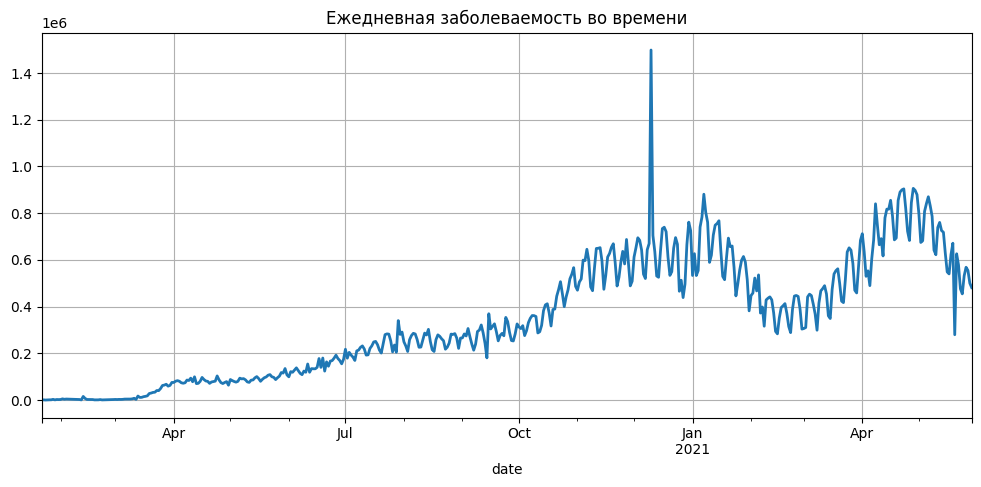

In [27]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 5),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=2
);

**Примечание.** Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).

На графике выше отчётливо виден умеренный начальный рост заболеваемости, после чего наблюдается её резкое повышение в середине октября 2020 года, а в декабре 2020 года — аномальная вспышка коронавируса (зафиксировано более 1.4 млн. заболевших в день). Такой резкий максимум, возможно, является ошибкой в данных и требует более детального разбора. Далее заметно постепенное уменьшение числа ежедневно фиксируемых случаев и наступление второй волны в марте 2021 года. Наконец, начиная с мая 2021 года наблюдается очередной спад.

Пилообразность графика (подъёмы и спады с периодом в 7 дней) может быть связана с рабочими и выходными днями.

Нам неизвестно, как устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что:

спад в выходные обусловлен меньшей интенсивностью работы медицинских служб;
в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берётся/проводится меньше тестов, к понедельнику они ещё не готовы и диагноз ещё не поставлен;
минимум в понедельник может быть запаздыванием подсчёта статистики, т.е. на самом деле данные за понедельник — это данные за воскресенье.

####
Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

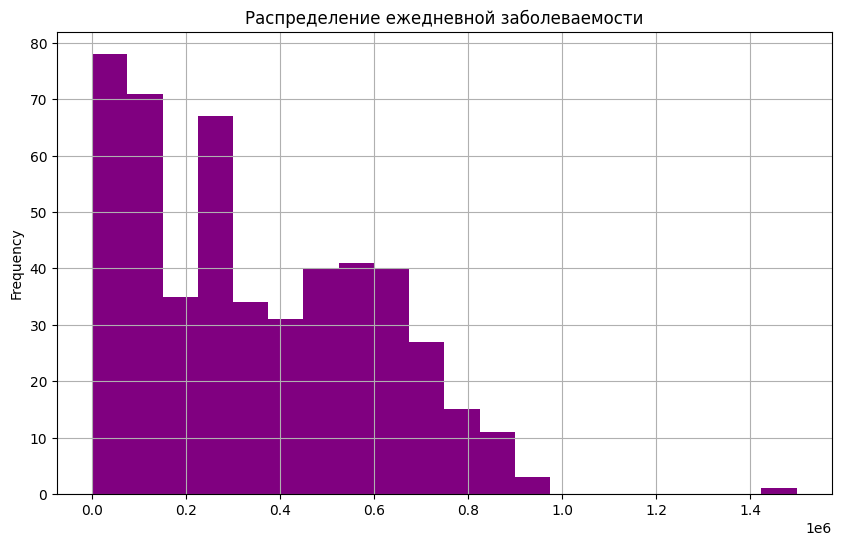

In [28]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'Purple',
    bins=20
);

Построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

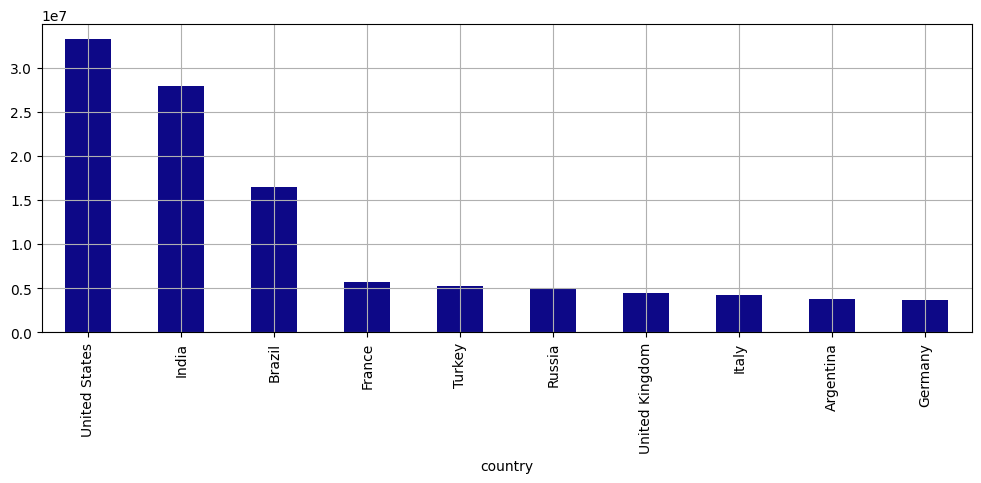

In [29]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

Посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

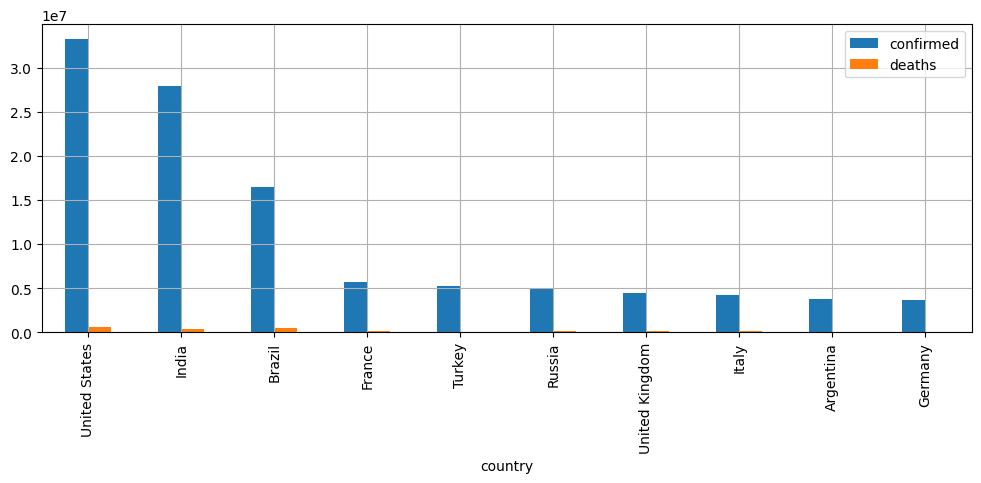

In [30]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4),
   
);

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!

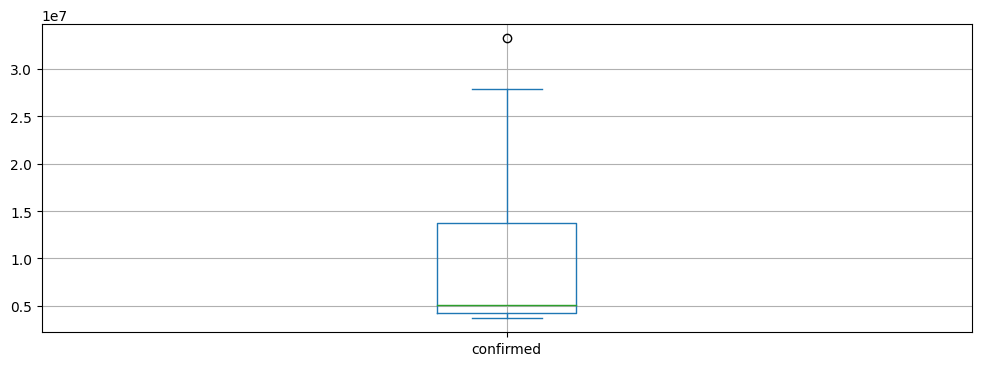

In [31]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='box',
    grid=True,
    figsize=(12, 4),
    
);

 Построим столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)

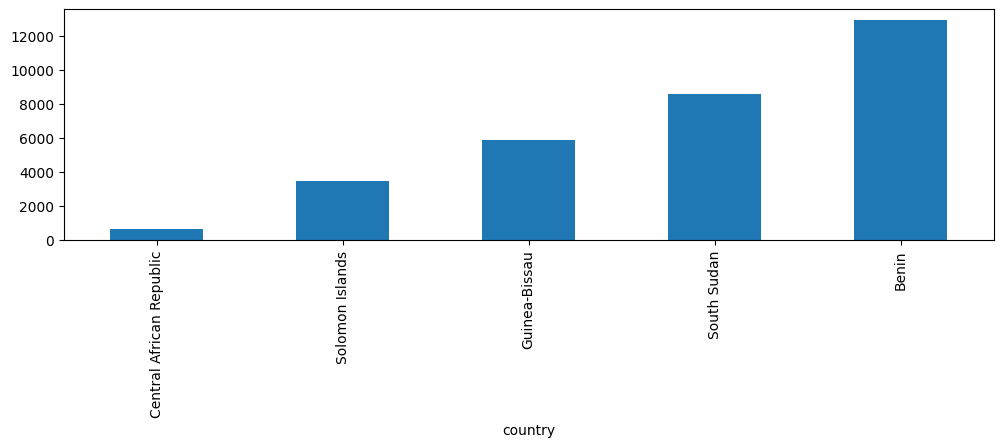

In [32]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar',figsize=(12, 3),);

## Работа с библиотекой matplotlib

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

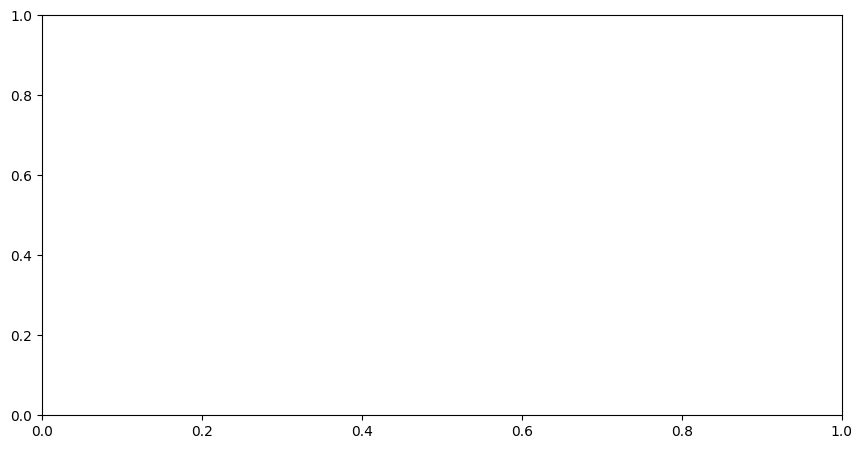

In [33]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

Теперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод scatter().



#### Основные параметры метода scatter

x, y — последовательности, которые будут отложены по осям абсцисс и ординат;\
s — размер маркеров;\
marker — вид маркеров ('o' — точки, '^' — треугольники);\
c — цвет маркеров.\

На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:

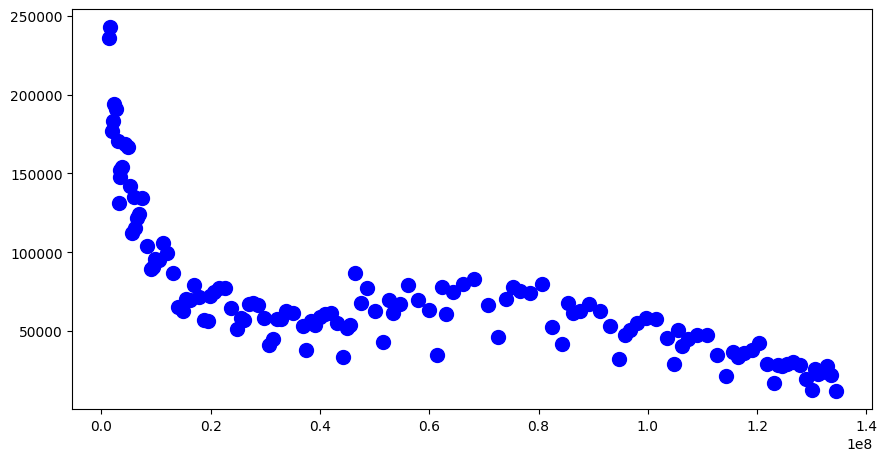

In [34]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

#### PIE круговая диаграмма 

Построим круговую диаграмму, чтобы отобразить ТОП-10 комбинаций вакцин в мире.

### Основные параметры метода pie()

**x** — значения, по которым будет строиться круговая диаграмма;\

**labels** — метки, соответствующие значениям;\

**autopct** — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%");\

**explode** — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x.\

ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

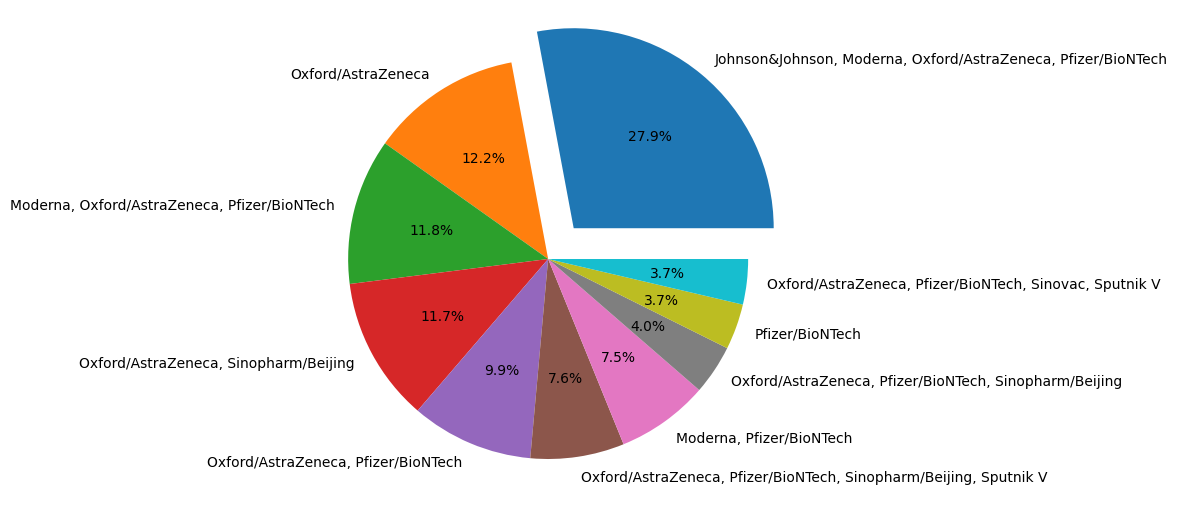

In [35]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

Самой распространённой комбинацией вакцин является комбинация: Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech. Причём можно заметить, что в большинстве популярных комбинаций присутствует вакцина Oxford/AstraZeneca.

#### Реализация правильной статистики по использованию вакцин с отчисткой данных

Обратите внимание, что диаграмма показывает соотношение только для десяти популярных комбинаций вакцин, а не для всех вакцин в совокупности, что является не совсем корректным для круговой диаграммы, так как она должна отображать единое целое.

К тому же наша круговая диаграмма считает количество использований каждой комбинации в таблице, а не количество стран, в которых используется эта комбинация, что также является некорректным.

→ Более правильным вариантом в данном случае было бы выделить каждую вакцину в отдельности и посчитать, в скольких странах она используется.

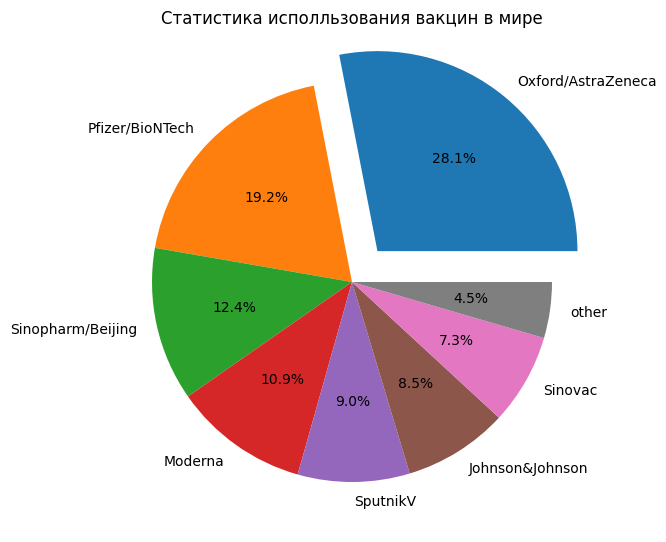

In [36]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
    explode = [0.2, 0, 0, 0, 0, 0, 0, 0]
)
axes.set_title('Статистика исполльзования вакцин в мире') ;

### ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ

Вы, наверное, заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нём изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно — вы всегда сможете подсмотреть их в документации):

**axes.set_title()** — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);\

**axes.set_xlabel()** — название оси абсцисс;\

**axes.set_ylabel()** — название оси ординат;\

**axes.set_xticks()** — установка отметок на оси абсцисс;\

**axes.set_yticks()** — установка отметок на оси ординат;\

**axes.xaxis.set_tick_params()** — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);\

**axes.yaxis.set_tick_params()** — управление параметрами отметок на оси ординат;\

**axes.legend()** — отображение легенды;\

**axes.grid()** — установка сетки.\

Например, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси абсцисс откладываются значения столбца таблицы, по оси ординат — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

'# символ скрывает отображение параметров графика при его публикации'

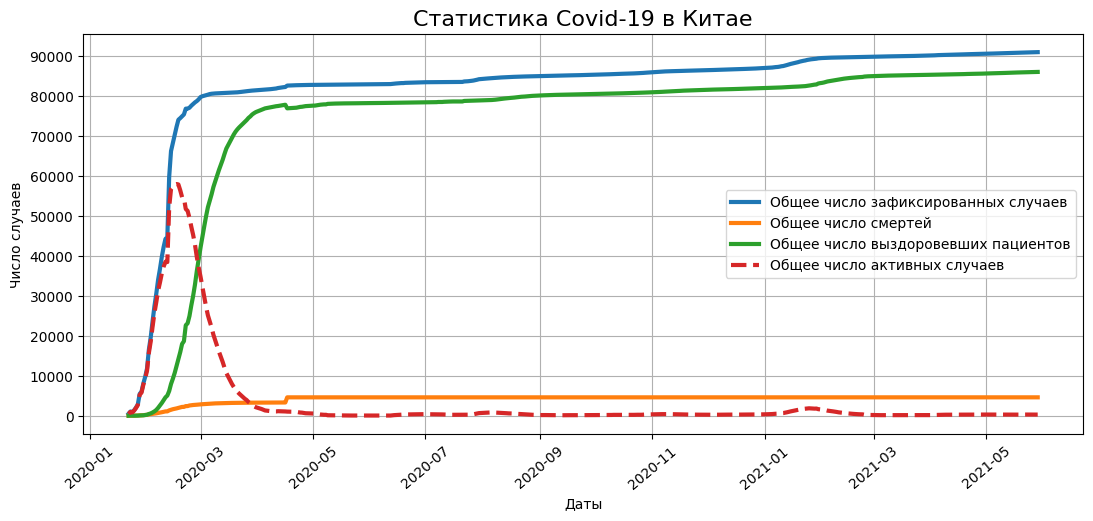

In [37]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3) # label - отображает подпись графика
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16) # отображаем заголовок 
axes.set_xlabel('Даты') # подпись данных по оси абсцисс
axes.set_ylabel('Число случаев') # подпись по оси ординат
axes.set_yticks(range(0, 100000, 10000)) # диапазон отображаемых данных по оси ординат 
axes.xaxis.set_tick_params(rotation=40) # отображение подписи данных по оси абсцисс. Указываем параметр угол наклона записи
axes.grid() # отображение сетки
axes.legend() # отображение легенты 
; # символ скрывает отображение параметров графика при его публикации

### ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ

→ Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для этого построим столбчатые диаграммы с помощью метода bar().



##### Основные параметры метода bar()

*x* — названия категорий, которые будут располагаться по оси абсцисс;\

*height* — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.);\

*width* — ширина столбцов диаграммы;\

*color* — цвет.

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

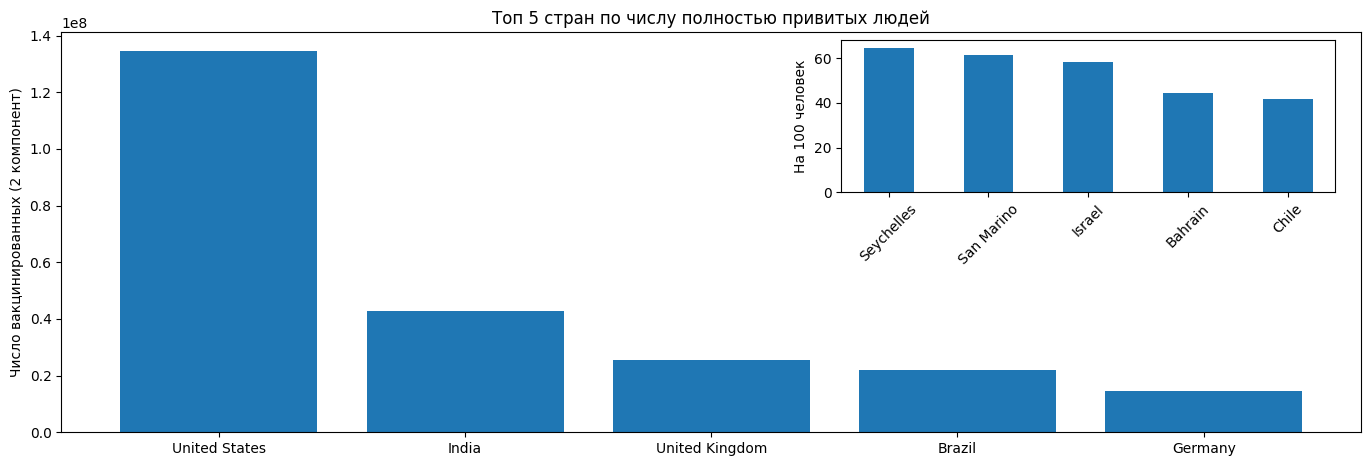

In [38]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38]) # задаем параметры для располоения дополнительного графика, относительно созданной рабочей области
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Нетрудно заметить, что два представленных рейтинга отличаются: лидером по числу полностью привитых является США, а вот по числу вакцин на 100 человек населения — Сейшелы. В первый список попали страны с большим количеством населения, которое они активно прививают. Во второй список попали маленькие страны, которые проще всего обеспечить вакциной.

В наш ТОП не попали страны, которые пользуются однокомпонентной вакциной, например Китай.

### Создание системы координат из диаграмм

Основные параметры метода subplots()

nrows — число строк;

ncols — число столбцов;

figsize — общий размер фигуры в дюймах (ширина и высота).


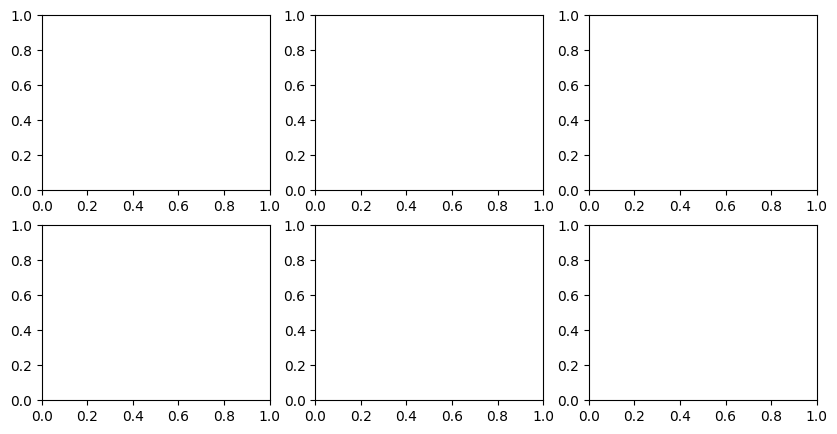

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5)) # создали фигуру размером figsize и список диаграмм 2 на 3

Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.



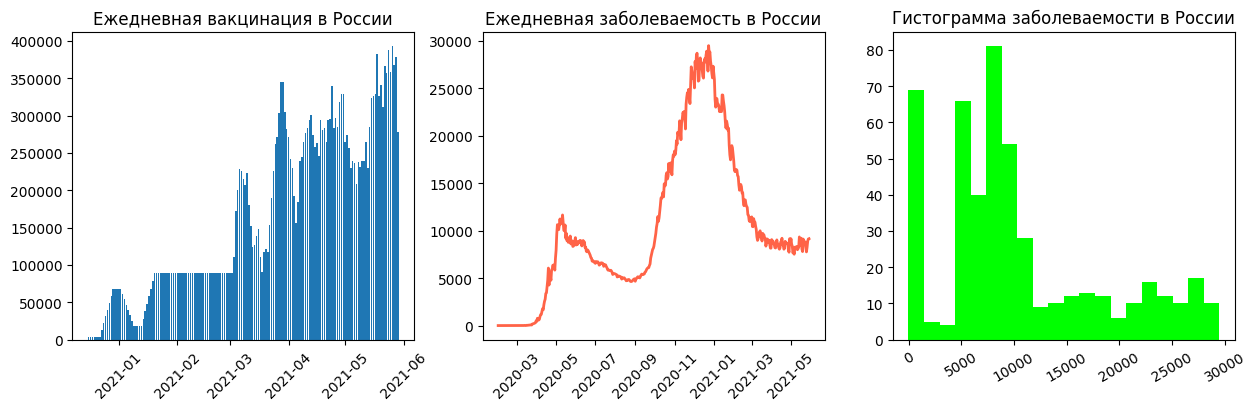

In [40]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

Также стоит отметить, что, помимо объектно-ориентированного подхода в работе с библиотекой Matplotlib, вы можете встретить и модульный подход.

Модульный подход основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей. Например, следующий код строит столбчатую диаграмму: по оси x откладываются элементы списка names (названия групп), а высоту столбцов определяет список values

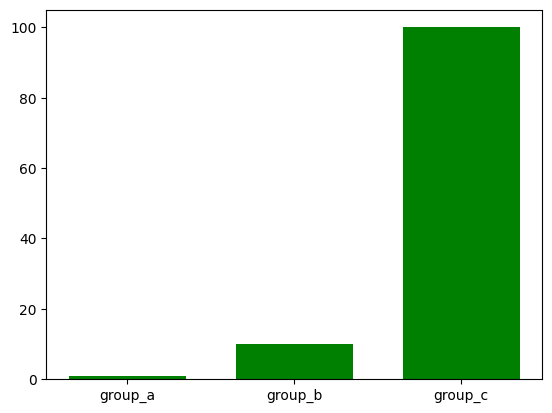

In [41]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values,color='green', width=0.7)
plt.show()

# Работаем с Seaborn

Мы будем сравнивать несколько стран: Россию, Австралию, Германию, Канаду и Великобританию. Создадим специальный DataFrame croped_covid_df для этих данных.

Для фильтрации по списку значений используем метод isin(), который проверяет, есть ли запись в столбце в переданном в метод списке. В результате возвращается привычная нам маска.

⭐ А теперь снова немного магии Feature Engineering, чтобы показатели по странам стали сопоставимыми: добавим информацию о населении стран, чтобы рассчитать ежедневную заболеваемость на 100 человек — заболеваемость в процентах от общего количества населения (daily_confirmed_per_hundred).

In [42]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

**Основные параметры метода histplot()**

data — DataFrame, по которому строится график;

x — признак, который будет отложен по оси абсцисс;

y — признак, который будет отложен по оси ординат;

hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);

ax — система координат Matplotlib, в которой строится график;

color — цвет графика;

bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);

kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

Построим сразу две гистограммы: одна будет иллюстрировать общее распределение ежедневной заболеваемости (daily_confirmed), а вторая — то же распределение в разрезе стран. 

Для этого создаём две координатные плоскости с помощью метода subplots(). 

На первой координатной плоскости рисуем простую гистограмму с 25 столбцами, а также добавим на неё сглаживающую кривую. 

На второй гистограмме добавляем параметр названия страны по оси y. В таком случае количество наблюдений будет обозначаться на диаграмме яркостью цвета (чем темнее полоса, тем больше наблюдений находится в интервале).

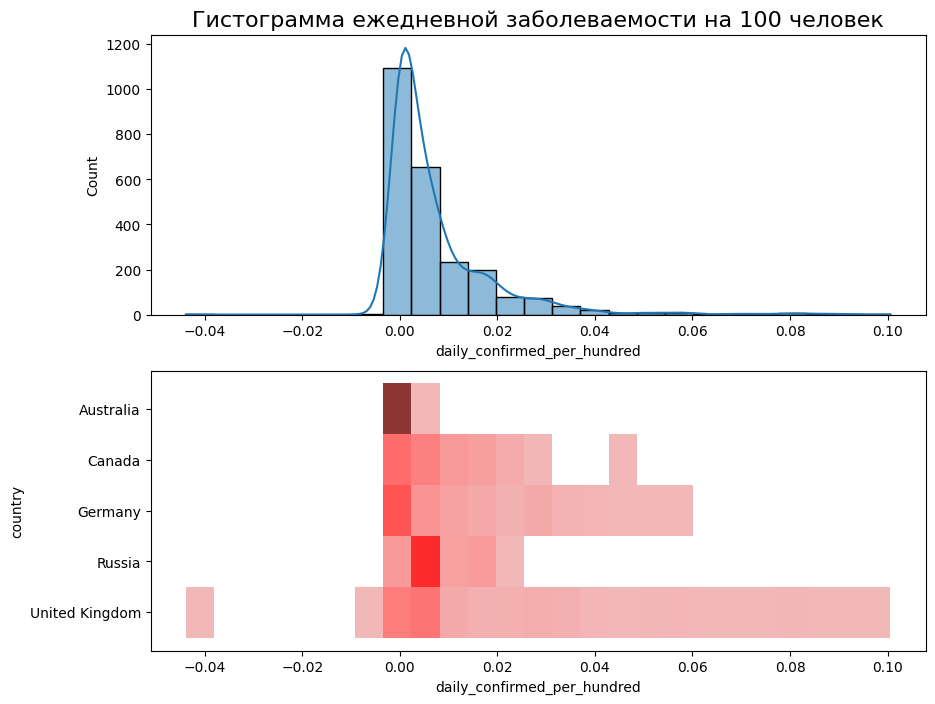

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)

sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

Общая гистограмма показывает, что ежедневная заболеваемость в выбранных странах не превышает 0.1 % от общего количества населения, причём большая часть наблюдений сосредоточена около 0. 

Также отчётливо видны аномалии — маленькие «пеньки», где заболеваемость отрицательная.

Гистограмма по странам показывает, какой вклад в общее распределение вносит заболеваемость в каждой из стран по отдельности. Например, ясно, что пик около нуля на общей гистограмме в основном задаётся Австралией, так как в ней ежедневная заболеваемость не превышала 0.005 % от общего числа населения (около 1.5 тыс. человек в день) и все наблюдения сосредоточены в двух интервалах. Чуть больший разброс по числу фиксируемых в день случаев имеет Россия, затем идут Канада, Германия и Великобритания.

Отличительной особенностью распределения для России и Великобритании является то, что для них характерен больший процент заболевших (самая тёмная отметка находится правее, чем у других стран).

Наконец, видно, что аномальная отрицательная заболеваемость принадлежит Великобритании. Об аномалиях, их поиске как с помощью визуализации, так и иными методами мы ещё будем говорить.

## Коробчатые диаграммы

Рассмотрим пример — построим коробчатые диаграммы признака летальности (death_rate).

Коробчатые диаграммы в Seaborn строятся с помощью метода boxplot().

Ящики отразим горизонтально (для этого по оси x отложим признак летальности, а по оси y — страны), параметр orient отвечает за ориентацию диаграммы, а width — за ширину коробок:

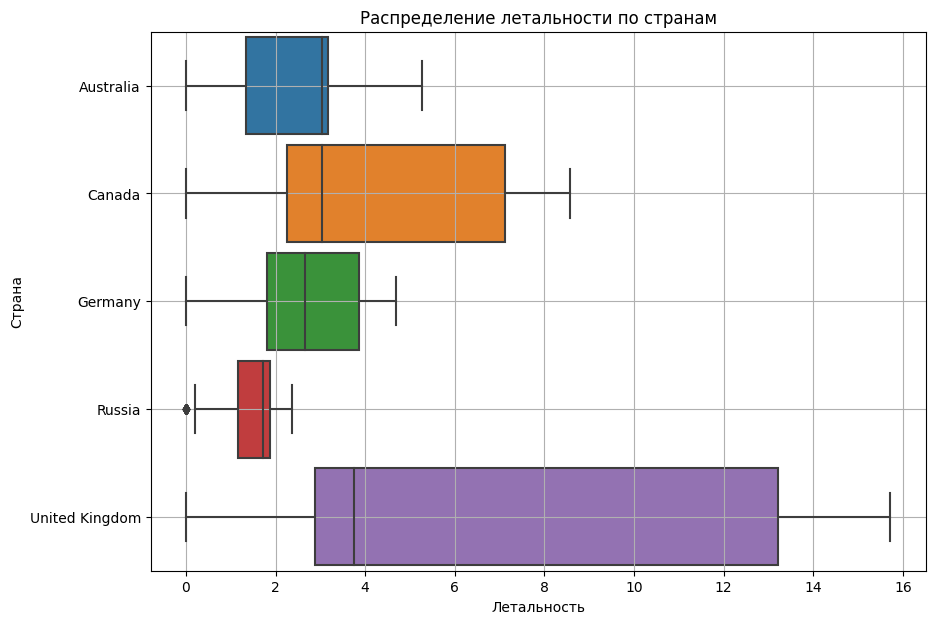

In [44]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

Из выделенных стран наиболее стабильная во времени летальность от коронавируса — в России (ширина ящика наименьшая), она же является самой низкой (наименьшая медиана). Наибольший разброс имеет процент смертей в Великобритании, что объясняется вирусологами и британскими СМИ как неподготовленность страны к эпидемии в её начале, что приводило к высокой летальности. Однако, судя по тому что медианное значение летальности в стране практически совпадает со всеми остальными, можно сказать, что со временем обстановка стабилизировалась.

### Многоуровневые столбчатые диаграммы

Теперь рассмотрим пример многоуровневой столбчатой диаграммы. С помощью неё мы можем, например, посмотреть на средний ежедневный процент заболевших в странах по кварталам.

Для построения столбчатых диаграмм в Seaborn используется метод barplot(). По умолчанию метод отображает среднее по столбцу, который указан в параметре x (вместо среднего можно вычислить и любую другую статистическую характеристику, наименование которой задаётся в параметре estimator). Для добавления многоуровневости используется параметр hue, который позволяет группировать данные по признаку:

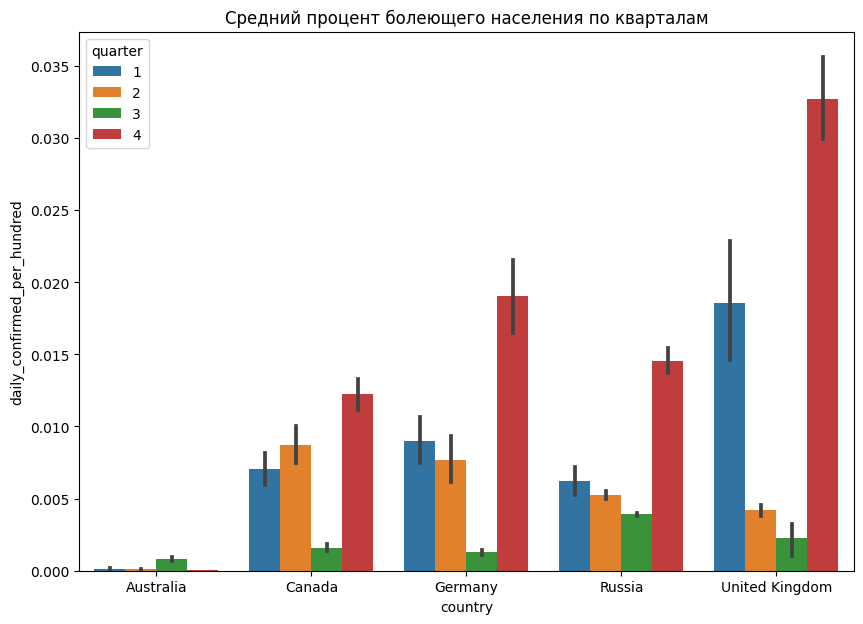

In [45]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

Диаграмма показывает, как зависит средний ежедневный процент заболевших от страны и квартала. Отчётливо видно, что во всех странах (кроме Австралии), большинство людей заболевают в четвёртом квартале (октябрь, ноябрь, декабрь), когда иммунитет особенно ослаблен, а наименьшее число заболевших соответствует третьему кварталу (июль, август, сентябрь).

## sns.jointplot

Построим один из самых любимых дата-сайентистами графиков — jointplot() — в котором совмещены диаграмма рассеяния и гистограмма. Это довольно удобный и полезный инструмент, когда мы хотим одновременно посмотреть и на распределения переменных, и сразу оценить их взаимосвязь.

Построим jointplot зависимости ежедневной заболеваемости в странах от общей численности населения в процентах (daily_confirmed_per_hundred) от числа полностью вакцинированных в процентах (people_fully_vaccinated_per_hundred).

Параметры xlim и ylim определяют диапазон отображения осей x и y. Параметр height отвечает за высоту и ширину графика (он квадратный).

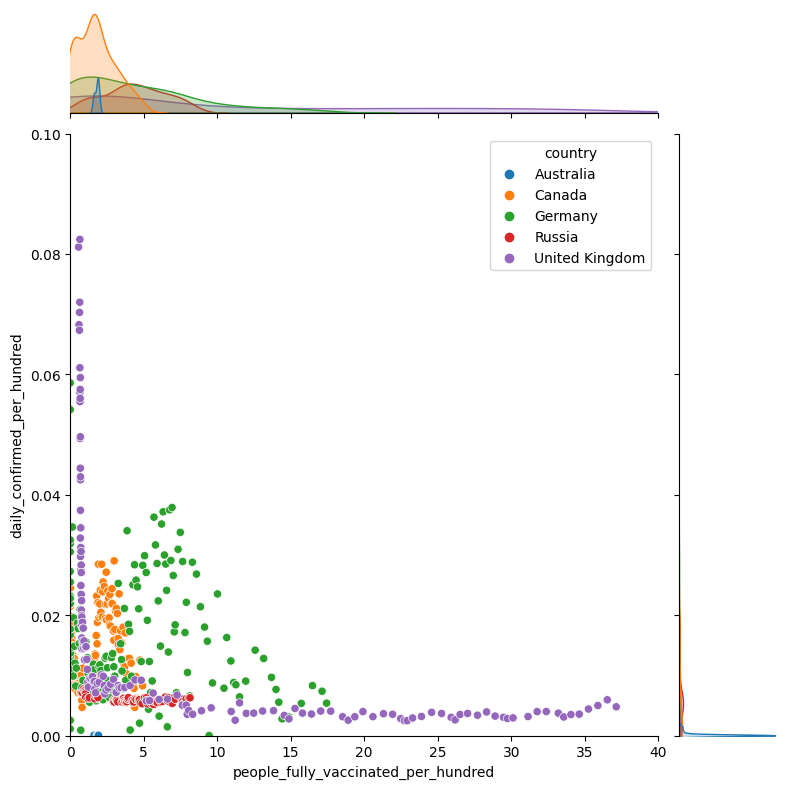

In [46]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

Из графика для Великобритании и России наблюдается следующая тенденция: с увеличением числа полностью привитых людей уменьшается ежедневное число заболевших. Для Канады и Германии такая же тенденция наблюдается только после достижения отметки в 7 % полностью привитого населения. Однако это может быть стечением обстоятельств, так как вирусологи говорят о необходимости полного вакцинирования 60 % населения в стране для снижения заболеваемости.

 ## Тепловая карта.

Допустим, мы хотим сравнить темпы вакцинации по странам во времени. Вы, скорее всего, сразу подумали о линейном графике. Но давайте мыслить шире. Когда мы хотим сравнить скорость изменения показателей по малому количеству категорий (в данном случае — по странам, а их у нас их всего пять), нагляднее всего будет тепловая карта.

Предварительно создадим сводную таблицу: по столбцам отложим признак даты, а по строкам — страны. В ячейках таблицы будет находиться процент вакцинированных (первым компонентом) людей в стране на определённую дату. Чтобы даты отображались на тепловой карте верно, их необходимо привести к типу string.

In [47]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date            2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                 NaN         0.0        0.00        0.01        0.02   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN        0.02         NaN         NaN   
United Kingdom        0.13         NaN         NaN         NaN         NaN   

date            2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                0.03        0.03        0.03        0.05        0.07   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN         NaN         NaN        0.04   
United Kingdom         NaN         NaN        0.99         NaN         NaN   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...         NaN         NaN         NaN         NaN   
Canada          ...       48.10       49.25       50.14       50.89   
Germany         ...       39.18       39.68       39.95       40.11   
Russia          ...       10.20       10.30       10.50       10.53   
United Kingdom  ...       55.01       55.33       55.63       55.82   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia            12.40       12.69       12.88       13.28       13.73   
Canada               51.77       52.39       53.05       53.95       54.99   
Germany              40.29       40.64       41.29       41.87       42.40   
Russia               10.70       10.81       11.07       11.12       11.19   
United Kingdom       55.99       56.27       56.61       56.99       57.29   

date            2021-05-29  
country                     
Australia            14.18  
Canada               55.71  
Germany              42.61  
Russia               11.29  
United Kingdom       57.56  

[5 rows x 168 columns]

Для построения тепловой карты в Seaborn используется метод heatmap(). Данный метод работает с табличными данными и визуализирует все ячейки таблицы с помощью цвета. Параметр annot отвечает за отображение легенды (аннотации), параметр cmap — за цветовую гамму графика.

''

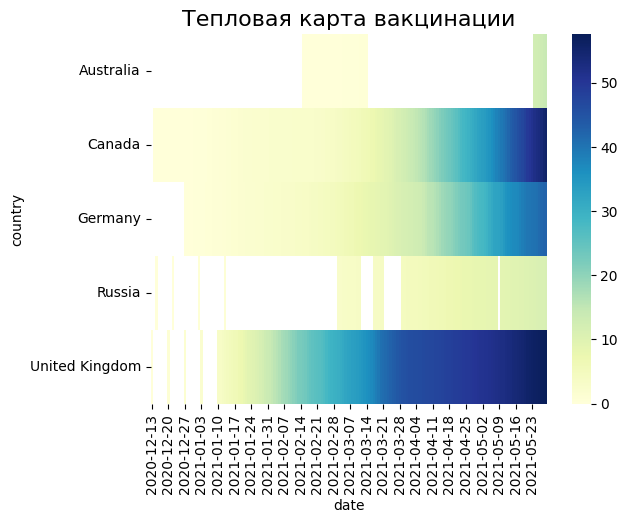

In [48]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', annot= False)
heatmap.set_title('Тепловая карта вакцинации', fontsize=16)
;

По тепловой карте легко можно понять, в каких странах темпы вакцинации выше, а в каких — ниже. Согласно легенде справа, чем ближе цвет полосы к синему, тем больше процент вакцинированных людей. Чем быстрее полоса переходит от блёклого жёлтого к насыщенному синему, тем выше темп вакцинации. Белые полосы обозначают отсутствие информации за данный период.

Так, можно судить, что наиболее активно кампания по вакцинации проходила в Великобритании, и на конец периода число вакцинированных первым компонентом людей в стране превысило отметку в 50 % от общего числа населения. В Канаде вакцинация населения вначале проходила медленнее, однако к концу периода наблюдений общий процент вакцинированных первым компонентом сравнялся с Великобританией.

Темпы вакцинации в России и Австралии гораздо ниже: здесь число привитых на конец периода составляет около 10 % от общего числа населения.

При этом с помощью тепловой карты мы смогли увидеть, что в данных о вакцинации в России, Великобритании и Австралии содержатся пропуски, и мы даже можем узнать, за какие периоды, посмотрев на ось абсцисс.

In [49]:
croped_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2439
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 2440 non-null   datetime64[ns]
 1   country                              2440 non-null   object        
 2   confirmed                            2440 non-null   float64       
 3   deaths                               2440 non-null   float64       
 4   recovered                            2440 non-null   float64       
 5   active                               2440 non-null   float64       
 6   daily_confirmed                      2435 non-null   float64       
 7   daily_deaths                         2435 non-null   float64       
 8   daily_recovered                      2435 non-null   float64       
 9   total_vaccinations                   649 non-null    float64       
 10  people_vacci

#### Ex: 6.4

Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
Постройте тепловую карту, которая покажет, как росло число заболевших в процентах от общего числа населения (confirmed_per_hundred) в странах из таблицы croped_covid_df.
Выберите верные выводы по построенному графику:

In [50]:
croped_covid_df['confirmed_per_hundred'] = (croped_covid_df['confirmed']/croped_covid_df['population'])*100

In [51]:
data_for_ex = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
) # pivit_table - метод
data_for_ex.columns = data_for_ex.columns.astype('string')
display(data_for_ex)

date            2020-01-23  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
country                                                                      
Australia              0.0    0.000016    0.000016    0.000019    0.000019   
Canada                 NaN         NaN    0.000003    0.000003    0.000005   
Germany                NaN         NaN         NaN         NaN    0.000005   
Russia                 NaN         NaN         NaN         NaN         NaN   
United Kingdom         NaN         NaN         NaN         NaN         NaN   

date            2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  \
country                                                                      
Australia         0.000019    0.000035    0.000035    0.000047    0.000047   
Canada            0.000005    0.000008    0.000008    0.000011    0.000011   
Germany           0.000005    0.000005    0.000006    0.000010    0.000012   
Russia                 NaN         NaN    0.000001    0.000001    0.000001   
United Kingdom         NaN         NaN    0.000003    0.000003    0.000003   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...    0.116606    0.116621    0.116637    0.116683   
Canada          ...    3.599497    3.611526    3.620169    3.628017   
Germany         ...    4.345962    4.355632    4.363299    4.368845   
Russia          ...    3.368999    3.375035    3.380916    3.386963   
United Kingdom  ...    6.594230    6.598223    6.601946    6.605033   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia         0.116722    0.116788    0.116854    0.116897    0.116932   
Canada            3.632706    3.642529    3.648718    3.661252    3.669520   
Germany           4.371625    4.374704    4.380047    4.388347    4.395716   
Russia            3.392637    3.397954    3.403604    3.409708    3.415960   
United Kingdom    6.608528    6.612093    6.616504    6.621495    6.627439   

date            2021-05-29  
country                     
Australia         0.116983  
Canada            3.675536  
Germany           4.401106  
Russia            3.422232  
United Kingdom    6.632219  

[5 rows x 492 columns]

''

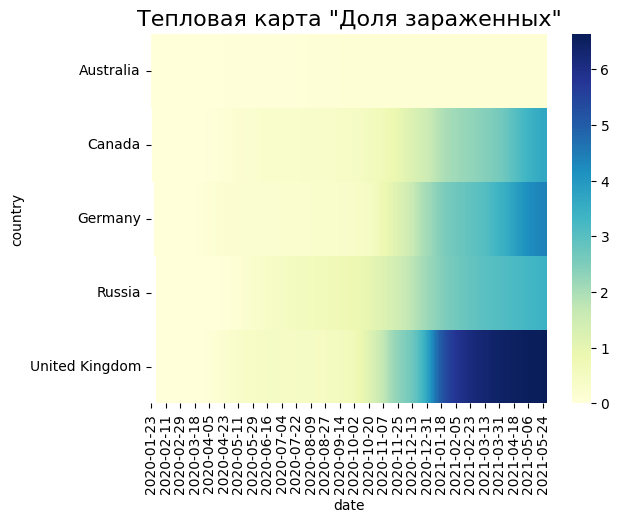

In [52]:
heatmap = sns.heatmap(data=data_for_ex, cmap='YlGnBu', annot= False)
heatmap.set_title('Тепловая карта "Доля зараженных"', fontsize=16)
;

### Ex: 6.5

Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).
Выберите верные выводы по данному графику:

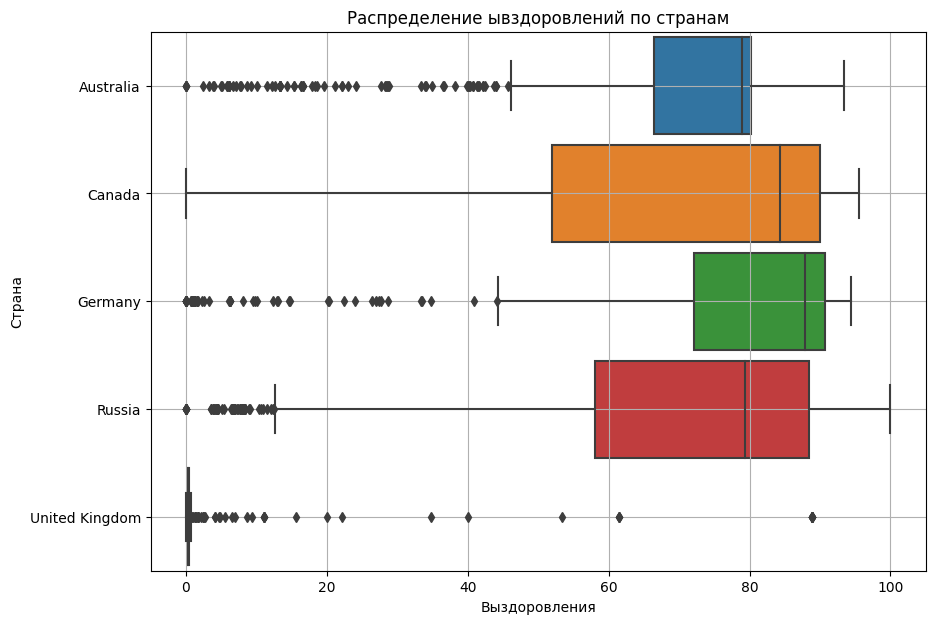

In [53]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение ывздоровлений по странам');
boxplot.set_xlabel('Выздоровления');
boxplot.set_ylabel('Страна');
boxplot.grid()

# Plotly

Библиотека Plotly является сравнительно новым коммерческим продуктом с бесплатной версией, который создавался специально для Data Science, в отличие от относительно старой библиотеки Matplotlib, которая изначально разрабатывалась для научных вычислений.



→ Библиотека Plotly позволяет строить интерактивные графики, которые можно приближать, отдалять, а также просматривать значения на графике в реальном времени. К тому же в библиотеке собрано огромнейшее количество красочных методов визуализации. У Plotly приятный дизайн, а способов работы с ней несколько.

→ С помощью Plotly можно делать сложные визуализации с элементами управления, например строить интерактивную 3D-визуализацию, карту мира и многое другое.

Раньше дата-сайентисты использовали Plotly как «тяжёлую артиллерию» по визуализации данных для задач, в которых нужны крайне специфичные графики, которых нет в традиционных библиотеках (например, тепловой карты мира), или в задачах составления красивых дашбордов.

Это было связано с тем, что традиционный Plotly имеет огромную функциональность со множеством параметров, в которых легко запутаться. Графики в библиотеке строятся иногда десятками строк кода, отрисовываются медленно и очень сильно нагружают видеокарту.

*Сейчас, с появлением новых оптимизированных модулей и надстроек в Plotly (express и cufflinks), которые позволили упростить работу с библиотекой, в отрасли наблюдается тенденция постепенного перехода бизнеса к использованию Plotly при работе с данными, ведь бесплатную версию библиотеки разрешено применять в коммерческих продуктах.*

*Примечание. Для того чтобы графики Plotly отображались в VS Code, необходимо установить расширение Jupyter Notebook Renderers.*

Рассмотрим процесс визуализации на примере. Посмотрим, как выглядит линейный график, построенный с помощью метода line() из модуля express. В документации к методу приведена пара десятков его параметров (они схожи с параметрами других методов) — мы приведём основные из них.



**Основные параметры метода line()**

data_frame — DataFrame, по которому строится график;

x — признак по оси абсцисс;

y — признак по оси ординат;

height — высота графика;

width — ширина графика;

title — название графика.

Построим график роста зафиксированного числа случаев заражения (confirmed), смертей (deaths), выздоровлений (recovered) и активных случаев (active) за всё время. Для этого просуммируем статистику по дням и передадим полученный DataFrame в метод line().

Для отображения созданной методом line() фигуры используется метод fig.show():

In [54]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()
;

/var/folders/jn/g9zbfzys667d9y8mfnmbh4fc0000gn/T/ipykernel_5718/2002817640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  line_data = covid_df.groupby('date', as_index=False).sum()


''

*В результате мы получаем график, который позволяет:*

*получать значения признака в отдельных точках в интерактивном режиме (наведите мышку на точку на графике, чтобы посмотреть информацию о её координатах);*

*регулировать отображения конкретных признаков с помощью легенды (отключать и включать данные признаки без изменения кода);*

*увеличивать фрагменты, выделяя их мышкой или приближая колёсиком мышки;*

*сохранять полученный график в формате PNG напрямую из Jupyter Notebook (нажмите на иконку фотоаппарата рядом с графиком).*

Давайте рассмотрим ещё один пример — построим столбчатую диаграмму, показывающую ТОП-10 стран по среднему проценту выздоравливающих пациентов (recover_rate). Для этого используем метод bar() модуля express. 

Добавим несколько параметров:

color — группирующий признак, в соответствии с которым будут раскрашены столбцы диаграммы;\
text — текст, который будет подписан на столбцах диаграммы;\
orientation — ориентация графика ('v' — вертикальная, 'h' — горизонтальная).\

In [55]:
#считаем средний процент выздоровлений для каждой страны
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="country", #ось x
    y="recover_rate", #ось y
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate' #заголовок
)

#отображаем его
fig.show()

## Основные параметры метода treemap()

**data_frame** — DataFrame, по которому строится график;

**path** — категориальные признаки (их может быть несколько), в разрезе которых строится диаграмма;

**values** — показатель, по которому рассчитываются размеры прямоугольников.

Но, как говорится, лучше один раз увидеть, чем сто раз прочитать. Построим иерархическую диаграмму для среднего ежедневного показателя выздоровевших пациентов (daily_recovered) во всех странах.



In [56]:
#считаем среднее ежедневно фиксируемое количество выздоровевших по странам
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #DataFrame
    path=['country'], #категориальный признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, #высота
    width=1000, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем график
fig.show()

### АНИМАЦИЯ ГРАФИКОВ ВО ВРЕМЕНИ

С помощью plotly.express можно строить даже анимированные графики. Мы рассмотрим только базовые приёмы анимации, но на самом деле это очень интересная и глубокая тема. Если вы захотите, то сможете ознакомиться с ней более детально здесь и здесь.

Для нашей задачи отлично подойдёт график под названием choropleth() (тепловая картограмма) — это тепловая карта, которая строится на географической карте мира. Чтобы увидеть, как изменяется значение показателя на карте во времени, можно добавить в график анимацию.

#### Основные параметры метода choropleth()

* data_frame — DataFrame, по которому строится график;

* locations — название столбца, из которого берутся локации (столбец со странами или регионами);

* locationmode — режим геопривязки; определяет, как будет производиться сопоставление данных с картой в Plotly (возможно сопоставление по названию страны, "country_name", или по её трёхзначному шифру, согласно международному стандарту ISO-3);

* range_color — диапазон изменения цвета;

* animation_frame — анимирующий признак, изменяя который, мы получаем визуализацию во времени;

* color_continuous_scale — цветовая палитра.

Итак, построим фоновую картограмму, которая покажет распространение (confirmed) коронавируса в мире во времени.

Предварительно для правильного отображения на анимационном бегунке даты в таблице covid_df необходимо перевести обратно в строковый тип данных.

In [57]:
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

# 3D графики и анимация

*На самом деле общий принцип построения 3D-графиков ничем не отличается от построения обычных. Просто добавляется ещё один параметр — ось z (ось аппликат).*

Рассмотрим пример.

Построим 3D-диаграмму рассеяния, которая покажет, как число ежедневно обнаруживаемых случаев и число ежедневных смертей влияют на желание людей вакцинироваться. Для того чтобы нам было проще рассматривать диаграмму (точки будут более сгруппированными), построим её в логарифмическом масштабе по осям абсцисс и ординат.

Для построения такой диаграммы используем метод scatter_3d(). Добавим несколько параметров:

* z — параметр по оси аппликат;
* log_x — установка логарифмического масштаба по оси x;
* log_y — установка логарифмического масштаба по оси y.

Чтобы не перегрузить график, будем строить зависимость только в нескольких странах: США, России, Великобритании, Бразилии и Франции. Наблюдения для каждой страны окрасим разными цветами.

In [58]:
#фильтруем таблицу по странам
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, #DataFrame
    x = 'daily_confirmed', #ось абсцисс
    y = 'daily_deaths', #ось ординат
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

#отображаем график
fig.show()
fig.write_html("/Users/mikhailgubanov/Yandex.Disk-gubanov.mn@phystech.edu.localized/Модуль_визуализация данных/scatter_3d.html")

### СОХРАНЕНИЕ ГРАФИКА PLOTLY

Чтобы сохранить интерактивный график, построенный в библиотеке Plotly, чаще всего используется метод фигуры fig.write_html('path/to/file.html'), который сохраняет график в формате HTML, после чего вы можете вставлять его на свой сайт, в веб-приложение или просто делиться им с коллегами. 

**Сохраним график трёхмерной диаграммы рассеяния:**

*fig.write_html("<путь для сохранения страницы>/scatter_3d.html")*

В результате в папке plotly (которую необходимо создать заранее) у вас появится файл с графиком.

### EX 7.5

Постройте линейный график, который отображает, как изменялось ежедневное количество вакцинированных (daily_vaccinations) в мире во времени. Из графика найдите, чему равно количество вакцинированных (в миллионах) 28 февраля 2021 года (2021-02-28). Ответ округлите до целого числа.

In [59]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['daily_vaccinations'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='daily_vaccinations' #заголовок
)
fig.show()
;

/var/folders/jn/g9zbfzys667d9y8mfnmbh4fc0000gn/T/ipykernel_5718/1968856646.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



''

### Ex 7.6

Постройте анимированную тепловую картограмму для числа поставленных вакцин во всём мире (total_vaccinations). На полученной карте найдите, чему равно количество вакцинированных в Японии (Japan) на 24 марта 2021 года (2021-03-24). Ответ приведите в тысячах (без нулей) и округлите до целого числа.



*Примечание. Если в jupyter notebook в VS Code не запускается анимация тепловой карты, попробуйте отобразить график командой fig.show(renderer='notebook').*

In [61]:
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="total_vaccinations", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global total_vaccinations of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Greens' #палитра цветов
)

#отображаем график
fig.show()
fig.write_html("/Users/mikhailgubanov/Yandex.Disk-gubanov.mn@phystech.edu.localized/Модуль_визуализация данных/Global total_vaccinations of COVID-19'.html")